In [1]:
import testing as tst
import impute as imp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
nombres_sarima=['tiempo','Direct','Global','Temperatura','Humedad','Presion','ws','wd','alturasolar','azimuth']
inputs=['time','Direct','Global','Temperatura','Humedad','ws','wd','P','Eg']
nombres_ann=['tiempo','Direct','Global','Difusa','Temperatura','Humedad','Presion']
# nombres_ann=['tiempo','#','Direct','Global','Temperatura','Humedad','Presion','ws','wd','alturasolar','azimuth']
sarima_2018=pd.read_csv('../../01_weather_data/03_imputing_process/02_imputed_data/Tmx_SARIMA_0_1_1_multioneshot.csv',index_col=0,parse_dates=True,skiprows=1,names=nombres_sarima)
tmx_2018=pd.read_csv('../../01_weather_data/03_imputing_process/01_test_data/tmx_base_2018_solar_angles.csv',index_col=0,parse_dates=True,names=nombres_sarima,skiprows=1)
ann_2018=pd.read_csv('../../01_weather_data/03_imputing_process/02_imputed_data/CNN-LSTM_test_data.csv',index_col=0,parse_dates=True,names=nombres_ann,skiprows=1)#('CNN-LSTM_test_data.csv',index_col=0,parse_dates=True,names=nombres_ann,skiprows=1)
yearly_sarima,daily_sarima,hourly_sarima=tst.dfmetricas(sarima_2018,tmx_2018,'SARIMA(0,1,1)')

In [3]:
yearly_sarima,daily_sarima,hourly_sarima=tst.dfmetricas(sarima_2018,tmx_2018,'SARIMA(0,1,1)')
yearly_ann,daily_ann,hourly_ann=tst.dfmetricas(ann_2018,tmx_2018,'CNN-LSTM')
# yearly_,daily_,hourly_=tst.dfmetricas(_2018,tmx_2018,'SARIMA(')
metricas=['model','E_dmae','E_dmape','mae_Ig']
df_metrics=pd.concat((yearly_ann[metricas],yearly_sarima[metricas]),ignore_index=True)
df_metrics[metricas]

,model,E_dmae,E_dmape,mae_Ig
0,CNN-LSTM,530.044127,11.204879,76.355088
1,"SARIMA(0,1,1)",628.485508,12.481125,89.337116


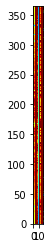

In [4]:
imshow=plt.imshow(daily_ann,cmap='jet',vmin=0,vmax=120,alpha=1,aspect='equal',origin='lower')

In [5]:
hourly_ann.to_csv('../../01_weather_data/03_imputing_process/ann_me.csv')
hourly_sarima.to_csv('../../01_weather_data/03_imputing_process/sarima_me.csv')

/var/folders/7n/c_cvng9j735c5pvm2v5k2tdh0000gp/T/ipykernel_47651/541818346.py:5: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(imshow,label='$I_g^{mae}[\dfrac{W}{m^2}]$')
/var/folders/7n/c_cvng9j735c5pvm2v5k2tdh0000gp/T/ipykernel_47651/541818346.py:9: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(imshow,label='$I_g^{mae}[\dfrac{W}{m^2}]$')


(<Figure size 403.2x93.6 with 2 Axes>, array([<AxesSubplot:>], dtype=object))

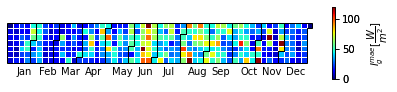

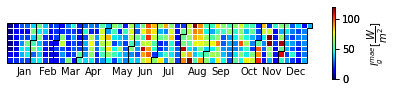

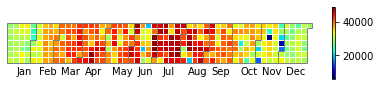

In [6]:
import calplot 
calplotsize=(5.6,1.3)
path_figures='../../../Tesis_repo/figures/'
calplot.calplot(daily_ann['mae'],yearlabels=False,dayticks=False,cmap='jet',how='mean',vmin=0,vmax=120,edgecolor='black',linewidth=1,figsize=calplotsize)
plt.colorbar(imshow,label='$I_g^{mae}[\dfrac{W}{m^2}]$')
# plt.savefig(path_figures+'testyear_ann.pdf')

calplot.calplot(daily_sarima['mae'],yearlabels=False,dayticks=False,cmap='jet',how='mean',vmin=0,vmax=120,edgecolor='black',linewidth=1,figsize=calplotsize)
plt.colorbar(imshow,label='$I_g^{mae}[\dfrac{W}{m^2}]$')
# plt.savefig(path_figures+'testyear_sarima.pdf')
calplot.calplot(tmx_2018['Global'],how='sum',cmap='jet',figsize=calplotsize,yearlabels=False,dayticks=False)



In [7]:
ms=[]
measured=np.stack(tmx_2018.Global)
predicted_ann=np.stack(ann_2018.Global)
predicted_sarima=np.stack(sarima_2018.Global)
reg_ann = LinearRegression(fit_intercept=False).fit(measured.reshape(-1,1),predicted_ann)
b_ann=reg_ann.intercept_
m_ann=reg_ann.coef_
reg_sarima = LinearRegression(fit_intercept=False).fit(measured.reshape(-1,1),predicted_sarima)
b_sarima=reg_sarima.intercept_
m_sarima=reg_sarima.coef_
ms.append(str(m_ann).replace('[','').replace(']',''))
ms.append(str(m_sarima).replace('[','').replace(']',''))
# np.array(m_ann,m_sarima)
# reg.fit()


In [8]:
print('m_ann:',m_ann)
print('b_ann:',b_ann)
print('m_sarima',m_sarima)
print('b_sarima',b_sarima)
x = np.linspace(1,1200)
y = 1 * x 
y_ann = m_ann * x +b_ann
y_sarima = m_sarima * x +b_sarima


m_ann: [0.97796249]
b_ann: 0.0
m_sarima [0.95434095]
b_sarima 0.0


In [9]:
r2s=[]
predict_ann = LinearRegression(fit_intercept=False).fit(measured.reshape(-1,1),predicted_ann).predict(measured.reshape(-1,1))
# reg_ols = LinearRegression()
# y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_ann = metrics.r2_score(predicted_ann,predict_ann)
predict_sarima = LinearRegression(fit_intercept=False).fit(measured.reshape(-1,1),predicted_sarima).predict(measured.reshape(-1,1))
# reg_ols = LinearRegression()
# y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_sarima = metrics.r2_score(predicted_sarima,predict_sarima)
r2s.append(r2_ann)
r2s.append(r2_sarima)
print("ann R2 score", r2_ann)
print("SARIMA R2 score", r2_sarima)

ann R2 score 0.9372755742865072
SARIMA R2 score 0.9169472240508288


In [10]:
params={'text.latex.preamble':'\\usepackage{lmodern,amsmath}',
       'text.usetex':True,
       'font.size':10,
       'font.family':'lmodern'}
# h_fmt=mdates.DateFormatter('%m-%d-%H')
plt.rcParams.update(params)

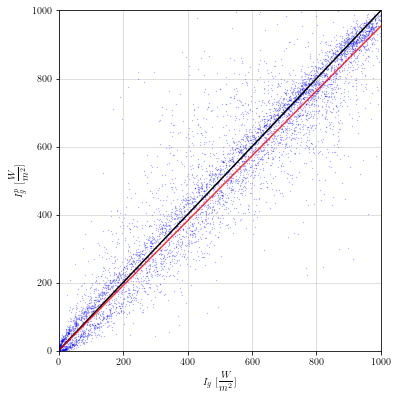

In [36]:
fig, ax=plt.subplots(figsize=(5.63,5.63))
ax.plot(measured[0:90*144],predicted_sarima[0:90*144],'b.',markersize=.5,alpha=.5) #markersize=.25
plt.plot(x,y,'k',linewidth=1.5)
plt.plot(x,y_sarima,'r',linewidth=1.5,alpha=.8)
ax.set_ylabel('$I_g^p$ $[\dfrac{W}{m^2}$]')
ax.set_xlabel('$I_g$ $[\dfrac{W}{m^2}$]')
ax.set_ylim(0,1000)
ax.set_xlim(0,1000)
ax.grid(alpha=.5)
plt.tight_layout()
plt.savefig(path_figures+'linreg_sarima.png')


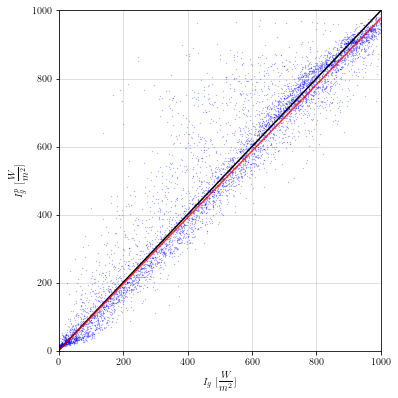

In [37]:
fig, ax=plt.subplots(figsize=(5.63,5.63))
# ax.plot(measured,predicted_sarima,'b.',markersize=.1)
# plt.scatter(measured,predicted_sarima)
ax.plot(measured[0:90*144],predicted_ann[0:90*144],'b.',markersize=.5,alpha=.5)
plt.plot(x,y,'k',linewidth=1.5,alpha=1)
plt.plot(x,y_ann,'r',linewidth=1.5,alpha=.8)


plt.grid(alpha=.5)

ax.set_ylabel('$I_g^p$ $[\dfrac{W}{m^2}$]')
ax.set_xlabel('$I_g$ $[\dfrac{W}{m^2}$]')
ax.set_ylim(0,1000)
ax.set_xlim(0,1000)
plt.tight_layout()
plt.savefig(path_figures+'linreg_ann.png')
# plt.plot(ann_2018.Global)
# plt.plot(sarima_2018.Global)
# reg = LinearRegression().fit(X, y)

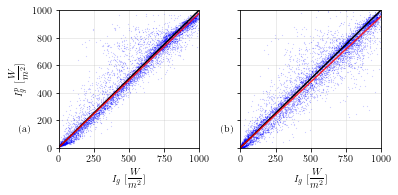

In [80]:
left, width = -.4, .2
right1=left+width
bottom, height = -.15, .25
top1 = bottom + height

left, width = -.25, .2
right2=left+width
bottom, height = -.15, .25
top2 = bottom + height





size=(5.63,5.63/2)
fig,axs =plt.subplots(1,2, figsize=size,sharey=True)
axs[0].plot(measured[0:90*144],predicted_ann[0:90*144],'b.',markersize=.28,alpha=.5)
axs[0].plot(x,y,'k',linewidth=1.5,alpha=1)
axs[0].plot(x,y_ann,'r',linewidth=1.5,alpha=.8)
axs[0].grid(alpha=.3)
axs[0].set_ylim(0,1000)
axs[0].set_xlim(0,1000)
axs[0].set_xlabel('$I_g$ $[\dfrac{W}{m^2}$]')
axs[0].text(right1, top1, '(a)',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=axs[0].transAxes)
axs[1].plot(measured[0:90*144],predicted_sarima[0:90*144],'b.',markersize=.28,alpha=.5)
axs[1].plot(x,y,'k',linewidth=1.5,alpha=1)
axs[1].plot(x,y_sarima,'r',linewidth=1.5,alpha=.8)
axs[1].grid(alpha=.3)
axs[1].set_ylim(0,1000)
axs[1].set_xlim(0,1000)
axs[1].set_xlabel('$I_g$ $[\dfrac{W}{m^2}$]')
axs[0].set_ylabel('$I_g^p$ $[\dfrac{W}{m^2}$]')
axs[1].text(right2, top2, '(b)',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=axs[1].transAxes)
plt.tight_layout()
plt.savefig(path_figures+'linreg.jpg',dpi=200)

In [13]:
def typical_error_day(dfrad):
    dfmingroup=dfrad.groupby(['minutodia',pd.Grouper(freq='1H')]).mean()
    dfmindia=dfmingroup.groupby(pd.Grouper(level='minutodia',axis=0)).mean()
    meanaltura=dfmindia.alturasolar.mean()
    meandiay=dfmindia.me.mean()
    return(dfmindia.mae,dfmindia.me)

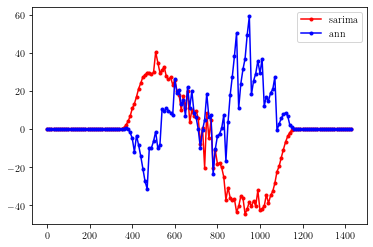

In [14]:
mae_sarima,me_sarima=typical_error_day(hourly_sarima)
mae_ann,me_ann=typical_error_day(hourly_ann)
plt.plot(me_sarima,'r.-',label='sarima')
plt.plot(me_ann,'b.-',label='ann')
plt.legend()

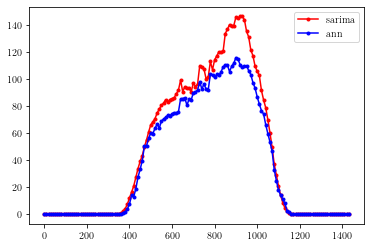

In [72]:
plt.plot(mae_sarima,'r.-',label='sarima')
plt.plot(mae_ann,'b.-',label='ann')
plt.legend()

In [14]:

metricas=['model','E_dmae','E_dmape','mae_Ig','$m$','$R^2$']
dfr2s=pd.DataFrame((r2s),columns=['$R^2$'])
dfms=pd.DataFrame((ms),columns=['$m$'])
linreg=pd.concat((dfms,dfr2s),axis=1)
df_allmetrics=pd.concat((df_metrics,linreg),axis=1)
df_allmetrics

,model,E_dmae,E_dmape,mae_Ig,$m$,$R^2$
0,CNN-LSTM,530.044127,11.204879,76.355088,0.97796249,0.937276
1,"SARIMA(0,1,1)",628.485508,12.481125,89.337116,0.95434095,0.916947
